# MATH123-HW3
Ethan Harvey

In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Question 5
(a)

In [2]:
def centered_and_scaled(X):
    centered = np.array([X[:,i]-X[:,i].mean() for i in range(X.shape[1])]).T
    scaled = np.array([centered[:,i]/centered[:,i].std() if not centered[:,i].std() == 0 else centered[:,i] for i in range(X.shape[1])]).T
    return scaled

def pca_vectors(X, number_components):
    X = centered_and_scaled(X)
    cov_matrix = (1/len(X))*X.T@X
    # sort eigen values/vectors 
    eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
    idx = eigen_values.argsort()[::-1]   
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:,idx]
    return eigen_values[:number_components], eigen_vectors[:,:number_components]

(b)

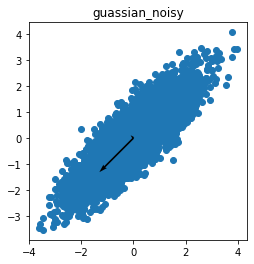

Percentage of variance for the first principal component: 0.923414932398875
Percentage of variance for the second principal component: 0.07658506760112516


In [3]:
A = np.loadtxt(open("gaussian_noisy.csv", "rb"), delimiter=",")

A_values, A_vectors = pca_vectors(A, 2)
quiver1 = [(A_values[0]*A_vectors[:,0])[0], (A_values[1]*A_vectors[:,1])[0]]
quiver2 = [(A_values[0]*A_vectors[:,0])[1], (A_values[1]*A_vectors[:,1])[1]]

plt.scatter(centered_and_scaled(A)[:,0], centered_and_scaled(A)[:,1], marker='o')
plt.quiver([0,0], [0,0], quiver1, quiver2, angles='xy', scale_units='xy', scale=1)
plt.gca().set_aspect('equal')
plt.title("guassian_noisy")
plt.show()

print("Percentage of variance for the first principal component:", A_values[0]/sum(A_values))
print("Percentage of variance for the second principal component:", A_values[1]/sum(A_values))

The percentage of variance for the first principal component is much higher than the percentage of variance the second principal component. In the figure, we can see that the first principal component points in the direction where there is the largest variance in our data.

(c)

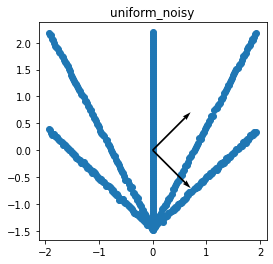

Percentage of variance for the first principal component: 0.500153585601037
Percentage of variance for the second principal component: 0.49984641439896305


In [4]:
B = np.loadtxt(open("uniform_noisy.csv", "rb"), delimiter=",")

B_values, B_vectors = pca_vectors(B, 2)
quiver1 = [(B_values[0]*B_vectors[:,0])[0], (B_values[1]*B_vectors[:,1])[0]]
quiver2 = [(B_values[0]*B_vectors[:,0])[1], (B_values[1]*B_vectors[:,1])[1]]

plt.scatter(centered_and_scaled(B)[:,0], centered_and_scaled(B)[:,1], marker='o')
plt.quiver([0,0], [0,0], quiver1, quiver2, angles='xy', scale_units='xy', scale=1)
plt.gca().set_aspect('equal')
plt.title("uniform_noisy")
plt.show()

print("Percentage of variance for the first principal component:", B_values[0]/sum(B_values))
print("Percentage of variance for the second principal component:", B_values[1]/sum(B_values))

The percentage of variance for the first principal component is about equal to the percentage of variance the second principal component.

### Question 6
(a)

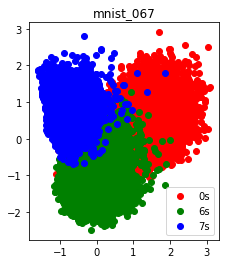

In [5]:
def project_data(X, number_components):
    X = centered_and_scaled(X)
    cov_matrix = (1/len(X))*X.T@X
    eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
    idx = eigen_values.argsort()[::-1]   
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:,idx]
    pca_vectors = eigen_vectors[:,:number_components]
    X_pca = X@pca_vectors
    return X_pca

import scipy.io
X = scipy.io.loadmat('mnist_067.mat')['data_067']
y = scipy.io.loadmat('mnist_067.mat')['label_067']
y = np.reshape(y, (21072))
X_pca = project_data(X, 2)
class0 = centered_and_scaled(X_pca)[y==0]
class6 = centered_and_scaled(X_pca)[y==6]
class7 = centered_and_scaled(X_pca)[y==7]
plt.scatter(class0[:,0], class0[:,1], c='r', marker='o', label='0s')
plt.scatter(class6[:,0], class6[:,1], c='g', marker='o', label='6s')
plt.scatter(class7[:,0], class7[:,1], c='b', marker='o', label='7s')
plt.gca().set_aspect('equal')
plt.title("mnist_067")
plt.legend()
plt.show()

This is a good low dimensional representation of the data because there is seperation between each of our digits 0, 6, and 7. However, digits 0, 6, and 7 still overlap in sections of the figure. If we increased the number of dimensions we would see better seperation.

(b)

In [ ]:
from sklearn.decomposition import PCA

number_components = [10*i for i in range(31)]
number_components[0]=1
class7 = centered_and_scaled(X)[y==7]
error = []
for i in number_components:
    pca = PCA(n_components=i)
    x_tilda = pca.inverse_transform(pca.fit_transform(class7))
    error.append(sum(np.linalg.norm(class7-x_tilda, axis=1)**2)/class7.shape[0])

plt.scatter(number_components, error)
plt.title("Reconstruction Error")
plt.show()